# Klaus' Setup <br> Data Preprocessing
***

In [1]:
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

<br>

## Features
***
**Outline**  
[Principal Component Analysis](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60 "Towards Data Sciene | PCA using Python (scikit-learn)") & 
[Data loading & preprocessing](https://keras.io/getting_started/intro_to_keras_for_engineers/#data-loading-amp-preprocessing "Keras") 
1. Load and normalize data
2. Apply PCA transformation
3. Normalize principal components

<br>

### 1. Loading & Normalization

In [2]:
feat = xr.open_dataset('data/da_pred_all.nc').to_dataframe()

feat_unit = pd.DataFrame(
    data = StandardScaler().fit_transform(feat), 
    columns = feat.columns,
    index =  feat.index
)

# print(feat_unit.mean())
# print(feat_unit.std())
# display(feat_unit)
# display(feat_unit.describe())

<br>

### 2. PCA

In [3]:
# Scikit pca transformation
pca = PCA().fit(feat_unit)

pca_components = pd.DataFrame(
    data = pca.components_
)

feat_pc = pd.DataFrame(
    data = np.dot(feat_unit, pca_components.T), # already centered '- pca.mean_' not necessary
    columns = [f'PC{i}' for i in range(1, 21)],
    index =  feat.index
)    

# print(feat_pc.mean())
# print(feat_pc.std())
# display(feat_pc)
# display(feat_pc.describe())

In [4]:
feat_unit

,siod_e,siod_w,sst_med,tsa,tna,sst_mdr,sata_lnh,sata_lsh,sata_onh,sata_osh,slp_darwin,slp_tahiti,amo,nao,pdo,np,nino12,nino3,nino34,nino4
year,,,,,,,,,,,,,,,,,,,,
1901,-1.100027,-1.152764,-0.745530,-0.595366,0.388372,0.608415,-0.123443,-0.732091,-0.497808,-0.737797,0.074807,1.634819,0.923204,0.917456,-0.193321,1.938388,-0.950168,-0.595561,-0.214314,-0.079270
1902,0.088643,0.340415,-1.507314,-0.954566,-0.346586,-0.173588,-1.289978,-0.201810,-1.175314,-0.987096,1.443896,2.682485,-0.620146,-1.172590,0.819716,-0.162154,0.991321,0.969845,1.099218,1.070532
1903,-0.900789,0.669332,-2.243639,-2.186294,-0.101970,0.283583,-1.333183,-1.076056,-1.415719,-1.333946,-0.071881,1.535042,-0.458290,-1.030410,-0.186187,0.530864,-0.371251,0.000784,0.524139,0.842095
1904,-0.949568,-1.056219,-0.079925,-1.975498,-2.214111,-1.894743,-1.135674,-1.133384,-1.863746,-1.778347,-0.903114,1.235708,-1.872482,1.447076,-0.892459,0.756497,-0.307712,-0.234313,-0.475713,-0.741738
1905,-0.034350,-0.632249,-0.718895,-1.684676,-1.334312,-1.014906,-1.314666,-0.595938,-1.284589,-0.954579,0.759351,-2.655622,-0.499163,-1.289888,0.545055,-0.326007,1.227830,1.497381,1.439037,1.032459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,1.195941,0.583772,0.639626,1.003018,1.582829,1.303061,1.610929,1.761660,1.567490,1.375820,-0.756426,0.686931,0.555350,1.141389,-0.550024,0.721578,-1.465545,-0.647168,-0.286199,0.034949
2014,2.023636,1.289688,1.409613,1.354204,0.162384,0.342794,2.036807,1.847651,2.092010,1.700992,0.074807,0.736820,0.035451,-0.237757,1.094378,-0.100373,0.606553,1.170538,0.948913,1.078147
2015,2.226665,1.764942,2.001272,1.161939,0.276530,0.362771,2.178766,2.026800,2.518182,1.809382,1.786168,0.038376,0.092673,1.404422,1.247760,0.281055,1.580828,2.093726,2.255911,2.532532


In [5]:
feat_pc

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
year,,,,,,,,,,,,,,,,,,,,
1901,-1.568434,-0.814406,-1.565711,-1.237071,1.472947,-0.593357,-1.660153,0.222967,0.241259,0.837099,0.098283,-0.767361,-0.099698,0.875102,-0.391004,0.067938,-0.012741,0.176348,0.188827,0.012466
1902,-0.521670,2.782115,-0.365347,2.152565,2.364542,0.248512,-1.855028,-0.231364,0.177858,0.788062,-0.135515,0.526785,-0.439029,0.236945,0.613192,-0.173206,-0.049516,0.003676,0.020811,-0.022700
1903,-2.357779,1.783520,-1.194862,1.368700,1.273662,-1.280782,-1.766921,0.441110,-0.412690,0.913848,-1.644854,0.649893,-0.240188,0.273618,0.151983,0.152255,-0.063746,0.036216,0.128500,0.007985
1904,-5.168501,0.642722,1.054827,-0.759804,1.351015,1.020594,-0.413493,-0.695127,-0.606953,-0.289135,-0.644362,0.201273,-0.556953,0.270713,0.003502,-0.383464,0.148037,-0.071637,0.241812,0.073306
1905,-1.282539,4.379097,0.640607,0.433165,-0.940971,-1.433710,1.068731,-1.191238,0.581742,-0.393126,-0.344745,-0.274467,0.226232,-0.207231,0.295327,-0.322379,0.324228,-0.052399,0.166036,0.116238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,2.834924,-3.262169,0.194996,-1.372389,-0.214579,-0.235963,-1.185155,0.561948,-0.628939,-0.102067,-0.023605,0.601052,-0.316267,0.204956,-0.220545,-0.176262,0.252748,-0.274187,-0.124419,-0.002756
2014,4.764721,-0.699161,1.576881,0.336399,0.368518,0.707072,-0.089740,-1.295925,-0.955070,-0.356942,0.328882,0.562871,-0.055759,0.666469,-0.097548,0.128218,-0.121305,-0.306969,0.041296,0.086950
2015,6.449053,1.195444,2.602754,-1.430389,0.940860,1.105021,-0.390206,-1.394210,-0.317858,-0.291646,-0.314138,-0.011063,0.381809,0.652830,0.156872,0.240292,-0.502077,-0.202351,-0.148239,-0.066116


<br>

### 3. Normalize Principal Components

In [6]:
feat_pc = pd.DataFrame(
    data = StandardScaler().fit_transform(feat_pc), 
    columns = feat_pc.columns,
    index =  feat_pc.index
)

# print(feat_pc.mean())
# print(feat_pc.std())
# display(feat_pc)
# display(feat_pc.describe())

<br>

## Labels
---

**label:** from Sahelrainfall data serves as validation data

In [7]:
# load validatoin data (Summer Rainfall over Sahel) 
labels = np.mean(np.loadtxt("data/da_o_sahelprecip19012017.txt", skiprows=8,)[:,7:10] * 0.01,  axis=1)

# eventually normlaize output as well
# labels = np.squeeze(StandardScaler().fit_transform(np.reshape(labels, (117,1))))

# display(labels)

<br>

## Merge to Xarray DataSet
---

In [8]:
model_data = xr.Dataset(
    data_vars=dict(
        feat_pc = (['year', 'pc'], feat_pc),
        labels = (['year'],labels),
        feat_standardized = (['year', 'indices'], feat_unit),
        pca_components = (['n_components', 'n_features'], pca_components),
    ),
    coords=dict(
        year = feat_pc.index,
        pc = feat_pc.columns,
        indices = feat.columns,
        n_features = range(20),
        n_components = range(20)
    )
)

model_data.to_netcdf('data/da_final_klausmodel.nc')

# display(model_data)

<br>

## Explained Vairance
---

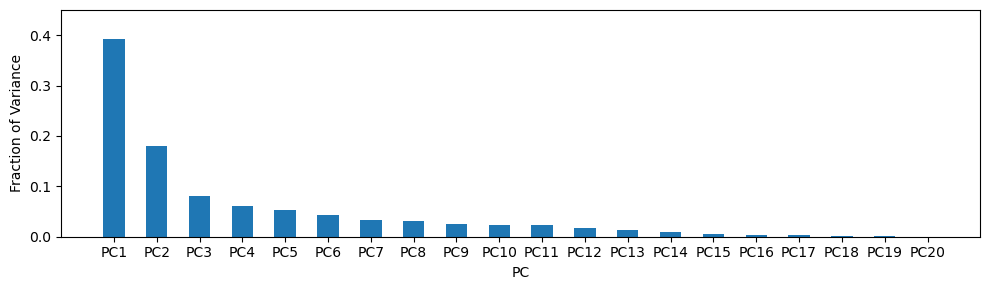

In [9]:
plt.figure(figsize=[10, 3], dpi=100)

plt.bar(feat_pc.columns, pca.explained_variance_ratio_, width=0.5)

plt.xlabel("PC")
plt.ylabel("Fraction of Variance")
plt.ylim(0, 0.45)

plt.tick_params(axis='x',which='minor', labelsize=11)

plt.tight_layout()
plt.savefig('./overleaf/img/klausmodel_pc_var.pdf', facecolor='w')

In [14]:
pca.explained_variance_ratio_.cumsum()

array([0.39234453, 0.57254786, 0.65369448, 0.71426198, 0.76631826,
       0.80941435, 0.84292682, 0.87323015, 0.89868398, 0.92280091,
       0.94541058, 0.96229802, 0.97570297, 0.98591656, 0.99037834,
       0.99419762, 0.99677689, 0.998721  , 0.99961114, 1.        ])

In [10]:
pca.explained_variance_ratio_[:10].sum()

0.9228009074252589